In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense

In [2]:
data = pd.read_csv("customer_churn.csv")

In [3]:
data.shape

(7043, 21)

In [4]:
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


# A) Data Manipulation:

In [5]:
#a. Find the total number of male customers
sum(data['gender']=="Male")

3555

In [6]:
# b Find the total number of customers whose Internet Service is ‘DSL’
sum(data['InternetService']=="DSL")

2421

In [7]:
#c. Extract all the Female senior citizens whose Payment Method is Mailed check & store the result in ‘new_customer’
new_customer=data[(data['gender']=='Female') & (data['SeniorCitizen']==1) & (data['PaymentMethod']=='Mailed check')]

In [8]:
new_customer

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
139,0390-DCFDQ,Female,1,Yes,No,1,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,70.45,70.45,Yes
176,2656-FMOKZ,Female,1,No,No,15,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.45,1145.7,Yes
267,3197-ARFOY,Female,1,No,No,19,Yes,No,Fiber optic,Yes,...,No,Yes,Yes,Yes,Month-to-month,Yes,Mailed check,105.00,2007.25,No
451,5760-WRAHC,Female,1,No,No,22,Yes,No,DSL,Yes,...,Yes,Yes,No,Yes,Month-to-month,Yes,Mailed check,69.75,1545.4,No
470,4933-IKULF,Female,1,No,No,17,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.65,330.6,No
694,2682-KEVRP,Female,1,No,No,22,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,20.05,417,No
747,3966-HRMZA,Female,1,No,No,3,Yes,No,Fiber optic,No,...,Yes,No,No,No,Month-to-month,No,Mailed check,75.05,202.9,No
947,9904-EHEVJ,Female,1,Yes,Yes,32,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,No,Month-to-month,Yes,Mailed check,91.35,2896.55,No
1029,4184-TJFAN,Female,1,Yes,Yes,3,Yes,No,Fiber optic,Yes,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,88.30,273.75,Yes
1112,2176-LVPNX,Female,1,No,No,71,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,Two year,No,Mailed check,89.85,6293.45,No


In [9]:
data['TotalCharges'] = data['TotalCharges'].replace("",0)

In [10]:
data['TotalCharges'] = data['TotalCharges'].replace(np.NaN,0)

In [11]:
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [12]:
data["TotalCharges"] = data["TotalCharges"].replace(r'^\s*$', 0, regex=True)

In [13]:
data["TotalCharges"] = data["TotalCharges"].astype(float) 

In [14]:
#d. Extract all those customers whose tenure is less than 10 months or their Total charges is less
#than 500$ & store the result in ‘new_customer’

In [15]:
new_customer=data[(data['tenure']<10) | (data['TotalCharges'] < 500)]

In [16]:
new_customer

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7029,2235-DWLJU,Female,1,No,No,6,No,No phone service,DSL,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,44.40,263.05,No
7030,0871-OPBXW,Female,0,No,No,2,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,20.05,39.25,No
7032,6894-LFHLY,Male,1,No,No,1,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,75.75,75.75,Yes
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No


B) Data Visualization:

In [17]:
#Build a pie-chart to show the distribution of customers would be churning out

In [18]:
print(data["Churn"].value_counts())
names = data["Churn"].value_counts().keys().tolist()
print(names)

No     5174
Yes    1869
Name: Churn, dtype: int64
['No', 'Yes']


[5174, 1869]


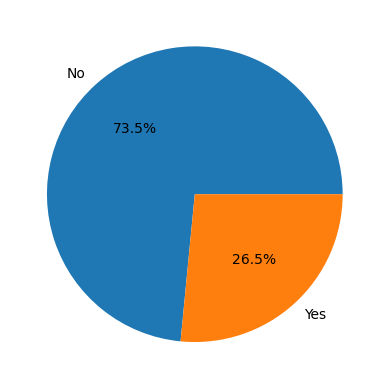

In [19]:
sizes= data["Churn"].value_counts().tolist()
print(sizes)
plt.pie(sizes,labels=names,autopct="%0.1f%%")
plt.show()

In [20]:
# Build a bar-plot to show the distribution of ‘Internet Service’

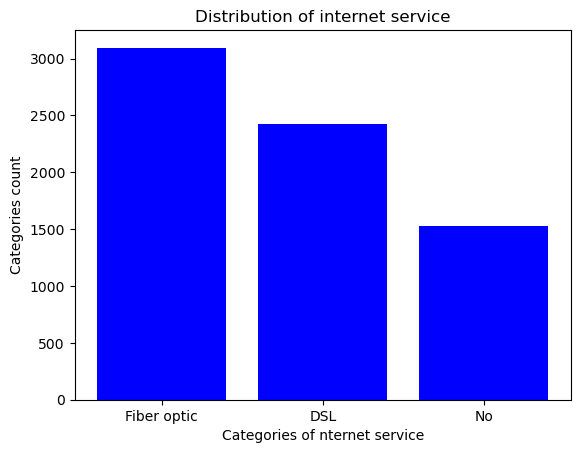

In [21]:
plt.bar(data['InternetService'].value_counts().keys().tolist(),data['InternetService'].value_counts().tolist(),color='blue')
plt.xlabel('Categories of nternet service')
plt.ylabel('Categories count')
plt.title('Distribution of internet service')
plt.show()

C) Model Building:

In [22]:
# a. Build a sequential model using Keras, to find out if the customerwouldchurn or not, using
# ‘tenure’ as the feature and ‘Churn’ as the dependent/target column:
# i. The visible/input layer should have 12 nodes with ‘Relu’ as activation function.
# ii. This model would have 1 hidden layer with 8 nodes and ‘Relu’ as activation function
# iii. Use ‘Adam’ as the optimization algorithm
# iv. Fit the model on the train set, with number of epochs to be 150
# v. Predict the values on the test set and build a confusion matrix
# vi. Plot the ‘Accuracy vs Epochs’ graph

In [23]:
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [24]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
data['Churn'] = labelencoder.fit_transform(data['Churn'])

In [25]:
X=data[['tenure']]
y=data[['Churn']]

In [26]:
y

,Churn
0,0
1,0
2,1
3,0
4,1
...,...
7038,0
7039,0
7040,0
7041,1


In [27]:

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=52)

In [28]:
x_train.shape

(4930, 1)

In [29]:
model = Sequential()
model.add(Dense(12, input_dim=1, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [30]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [31]:
x_train

,tenure
5069,4
1015,12
3406,31
2907,20
656,68
...,...
924,22
6230,1
4247,69
2827,1


In [32]:
y_train

,Churn
5069,1
1015,1
3406,0
2907,1
656,0
...,...
924,0
6230,0
4247,0
2827,0


In [33]:
history = model.fit(x_train, y_train, epochs=150, validation_data=(x_test,y_test))

Epoch 1/150
155/155 [==============================] - 1s 3ms/step - loss: 0.7975 - accuracy: 0.7442 - val_loss: 0.5071 - val_accuracy: 0.7440
Epoch 2/150
155/155 [==============================] - 0s 2ms/step - loss: 0.5131 - accuracy: 0.7558 - val_loss: 0.5075 - val_accuracy: 0.7440
Epoch 3/150
155/155 [==============================] - 0s 3ms/step - loss: 0.5125 - accuracy: 0.7558 - val_loss: 0.5082 - val_accuracy: 0.7534
Epoch 4/150
155/155 [==============================] - 1s 5ms/step - loss: 0.5125 - accuracy: 0.7558 - val_loss: 0.5071 - val_accuracy: 0.7534
Epoch 5/150
155/155 [==============================] - 1s 5ms/step - loss: 0.5127 - accuracy: 0.7568 - val_loss: 0.5073 - val_accuracy: 0.7515
Epoch 6/150
155/155 [==============================] - 1s 5ms/step - loss: 0.5124 - accuracy: 0.7550 - val_loss: 0.5072 - val_accuracy: 0.7515
Epoch 7/150
155/155 [==============================] - 1s 4ms/step - loss: 0.5121 - accuracy: 0.7550 - val_loss: 0.5076 - val_accuracy: 0.7515

In [34]:
from sklearn.metrics import confusion_matrix
y_pred_prob = model.predict(x_test)
y_pred = np.round(y_pred_prob)
confusion_matrix(y_test,y_pred)

67/67 [==============================] - 0s 3ms/step


array([[1441,  104],
       [ 417,  151]], dtype=int64)

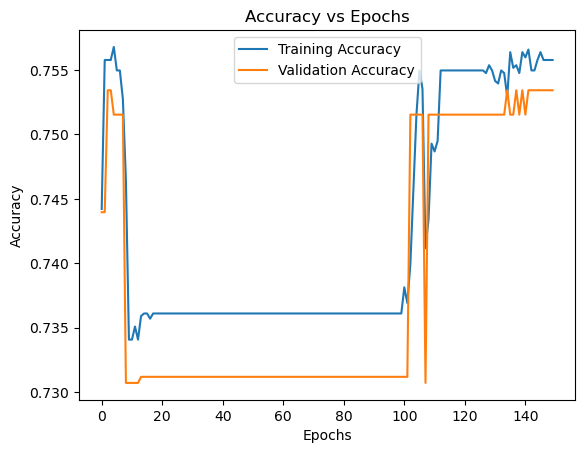

In [35]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

c. Build the 3rd model using ‘Tenure’, ’Monthly Charges’ & ‘Total Charges’ as the features and
‘Churn’ as the dependent/target column:
i. The visible/input layer should have 12 nodes with ‘Relu’ as activation function.
ii. This model would have 1 hidden layer with 8 nodes and ‘Relu’ as activation function
iii. Use ‘Adam’ as the optimization algorithm
iv. Fit the model on the train set, with number of epochs to be 150
v. Predict the values on the test set and build a confusion matrix
vi. Plot the ‘Accuracy vs Epochs’ graph

In [36]:
model = Sequential()
model.add(Dense(12, input_dim=3, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [37]:
from keras.optimizers import Adam
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])


In [38]:
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,0
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,0
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,1


In [39]:
X = data[["tenure","MonthlyCharges","TotalCharges"]]
y = data[["Churn"]]
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=52)
history = model.fit(x_train, y_train, epochs=150, batch_size=58, validation_split=0.2)


Epoch 1/150
68/68 [==============================] - 2s 9ms/step - loss: 110.7538 - accuracy: 0.7302 - val_loss: 71.0352 - val_accuracy: 0.7596
Epoch 2/150
68/68 [==============================] - 0s 5ms/step - loss: 34.0026 - accuracy: 0.7059 - val_loss: 3.7643 - val_accuracy: 0.7069
Epoch 3/150
68/68 [==============================] - 0s 5ms/step - loss: 1.7542 - accuracy: 0.5695 - val_loss: 1.5870 - val_accuracy: 0.5751
Epoch 4/150
68/68 [==============================] - 0s 5ms/step - loss: 1.0215 - accuracy: 0.5520 - val_loss: 0.8868 - val_accuracy: 0.4746
Epoch 5/150
68/68 [==============================] - 0s 5ms/step - loss: 0.8750 - accuracy: 0.6017 - val_loss: 0.7002 - val_accuracy: 0.6258
Epoch 6/150
68/68 [==============================] - 0s 5ms/step - loss: 0.6295 - accuracy: 0.6820 - val_loss: 0.5788 - val_accuracy: 0.7089
Epoch 7/150
68/68 [==============================] - 0s 5ms/step - loss: 0.5648 - accuracy: 0.7612 - val_loss: 0.5591 - val_accuracy: 0.7241
Epoch 8/1

In [40]:
from sklearn.metrics import confusion_matrix
y_pred_prob = model.predict(x_test)
y_pred = np.round(y_pred_prob)
confusion_matrix(y_test,y_pred)

67/67 [==============================] - 0s 3ms/step


array([[1427,  118],
       [ 298,  270]], dtype=int64)

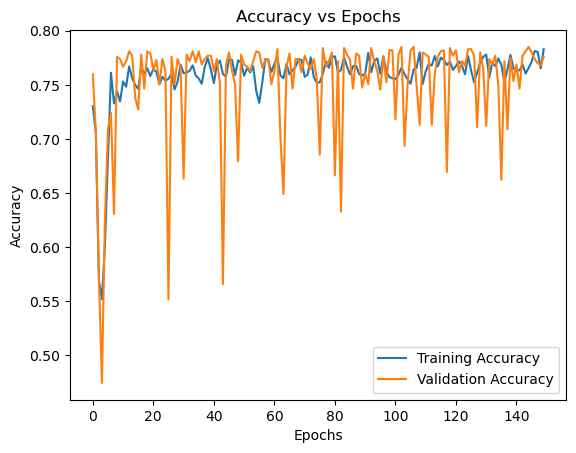

In [41]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()